# Part II - (Bike Sharing System Trips distribution)
## by (Martha Mwangi)

## Investigation Overview


In The investigation, I wanted to look at when the most trips are taken in terms of time of the day, day of the week and month of the year in a bike sharing sharing system in San Francisco Bay Area. Also I wanted to look at on whether the users were customers or subscribers.

## Dataset Overview

Ford GoBike System Data is a dataset that consists information of over 180,000 entries about individual rides made in a bike sharing system in San Francisco Bay Area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
dateparser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
bikedf = pd.read_csv('201902-fordgobike-tripdata.csv', parse_dates =['start_time', 'end_time'], date_parser=dateparser)
bikedf.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Add a column for day of the week
bikedf['day_of_week'] = bikedf['start_time'].dt.day_name()
bikedf['month_of_year'] = bikedf['end_time'].dt.month_name()
# Add a colum for the hour of the day
bikedf['time_of_day'] = bikedf['start_time'].dt.hour
# Apply the zfill on time of the day to pad single digit numbers with a leading zero
bikedf['time_of_day'] = bikedf['time_of_day'].map(lambda x: str(x).zfill(2))

In [4]:
# Get the total count of trips in each hour of the day
hour_count = {}

for h in bikedf['time_of_day']:
    hour_count[h] = hour_count.get(h, 0) + 1
hour = []
tripcount = []
for trip in hour_count.items():
    hour.append(int(trip[0]))
    tripcount.append(trip[1])
print(hour)
print(tripcount)
    

[17, 18, 12, 23, 22, 21, 20, 19, 15, 10, 16, 9, 11, 0, 13, 14, 8, 7, 5, 6, 4, 3, 2, 1]
[21864, 16827, 8724, 1646, 2916, 4561, 6482, 9881, 9174, 8364, 14169, 15903, 7884, 925, 8551, 8152, 21056, 10614, 896, 3485, 235, 174, 381, 548]


In [5]:
# Get trips count for each day of the week 
trip_count = {}
for t in bikedf['day_of_week']:
    trip_count[t] = trip_count.get(t, 0) + 1
    col_label = []
    trips = []
    for trip in trip_count.items():
        col_label.append(trip[0])
        trips.append(trip[1])
print(col_label)
print(trips)

['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday']
[35197, 29641, 31813, 26852, 15523, 15405, 28981]


## (Visualization 1)

From the chart, it shows that the most trips were taken in the evening hours of 1700 Hrs and at 0800Hrs with over 20,000 trips and reduced as the day progressed towards the morning hours with the least trips being recorded at 0300 hours of just 164 trips.

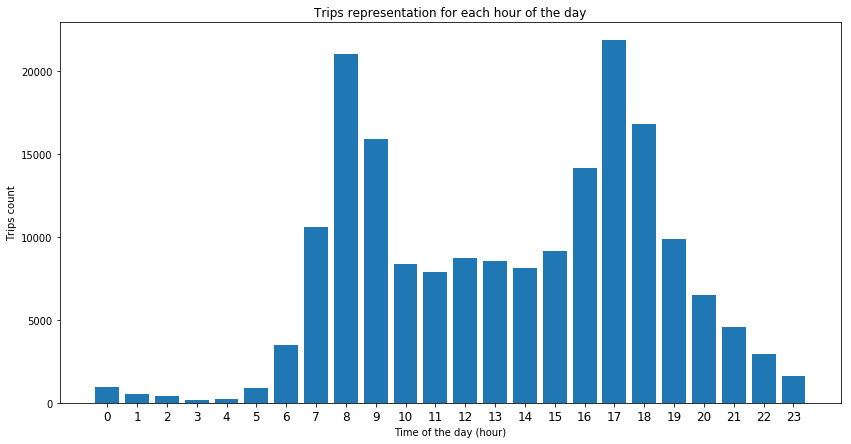

In [6]:
# plot a bar graph of trip count against the hours
def pltgraph(x,y, t, xl, yl):
    plt.figure(figsize = (14, 7))
    plt.bar(x, y)
    plt.title(t)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.xticks(x,size=12);
pltgraph(hour, tripcount,'Trips representation for each hour of the day', 'Time of the day (hour)','Trips count' )

## (Visualization 2)

From the chart, Thursday recorded the most number of trips with over 30,000 trips, followed closely by Tuesday and Thursday. The weekend, being Sunday and Saturday recored the least of trip followed by Monday from a distant.

In [7]:
# Get trips count for each day of the week 
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

data = bikedf['day_of_week'].value_counts().reindex(day_order)
print(data)

Monday       26852
Tuesday      31813
Wednesday    29641
Thursday     35197
Friday       28981
Saturday     15405
Sunday       15523
Name: day_of_week, dtype: int64


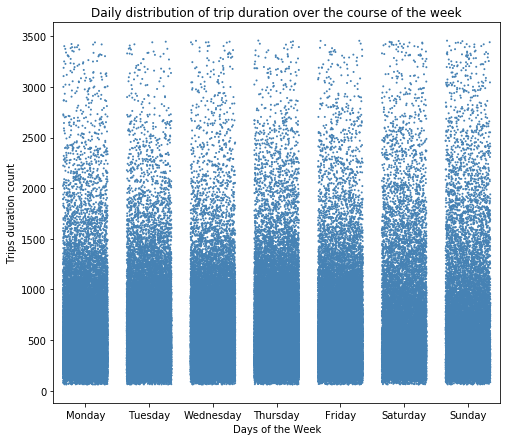

In [8]:
plt.figure(figsize = (8, 7))

sns.stripplot(data=bikedf.query('duration_sec<duration_sec.quantile(0.99)'),
x='day_of_week', y='duration_sec', size=2,jitter=0.35, color='steelblue', order=day_order);
plt.title("Daily distribution of trip duration over the course of the week")
plt.ylabel('Trips duration count')
plt.xlabel('Days of the Week');

## (Visualization 3)
The plot goes to show that, most trips were taken by subscribers as has been seen in previous deduction in the analysis process. Days that registered more trips is highly represented by subscribers which is suffice t say, subscribers took the most trips.


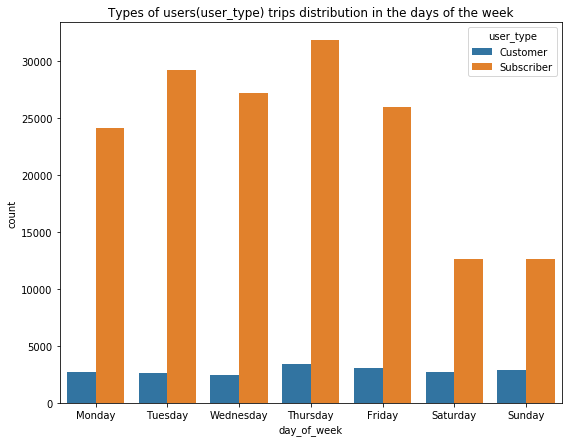

In [9]:
# Clustered plots of the user type feature in the days of the week in the trips data
plt.figure(figsize = (9, 7))
sns.countplot(data=bikedf, x = 'day_of_week', hue='user_type', order=day_order);
plt.title("Types of users(user_type) trips distribution in the days of the week");

In [10]:
# 

In [ ]:
!jupyter nbconvert Part_II_Communicate_Data_Findings.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook Part_II_Communicate_Data_Findings.ipynb to slides
[NbConvertApp] Writing 557103 bytes to Part_II_Communicate_Data_Findings.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Communicate_Data_Findings.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-op

In [ ]:
# 